In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Analytical population model - No Movement case

The analytical population model in absence of movement ($\lambda_0=0$ or $p_0=1$ cases) reduces to:

$$
\begin{cases}
\frac{da_0}{dt}=\lambda a_0 b_0 -\mu a_0
\\
\frac{db_0}{dt}=\sigma \, b_0 \left(1-\frac{b_0+a_0}{K} \right) -\lambda'a_0 b_0
\end{cases}
$$

## Statationarity - parameters dependence

In [ ]:
def a_stat_point(lambd, mu, sigma, K, lambd_p): # predator density stat point
    return (K - mu/lambd)/(1 + (lambd_p*K/sigma))

def b_stat_point(lambd, mu, sigma, K, lambd_p): # prey density stat point
    return mu/lambd

def a_stat_point_b(b_star, sigma, K, lambd_p): # predator density stat point (in function of the one of the preys)
    return (K - b_star)/(1 + (lambd_p*K/sigma))

<ipython-input-2-5febc9e8a8cb>:2: RuntimeWarning: divide by zero encountered in divide
  return (K - mu/lambd)/(1 + (lambd_p*K/sigma))


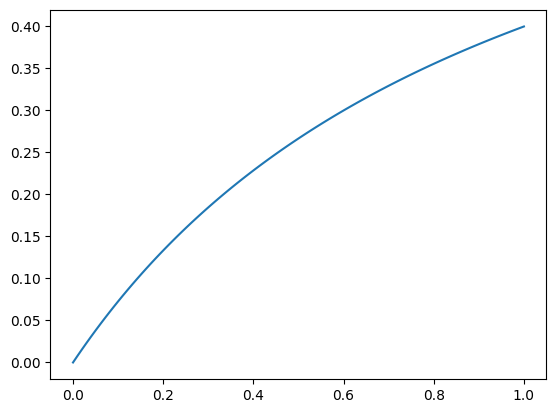

In [ ]:
x = np.linspace(0, 1, 100)
plt.plot(x, a_stat_point(1, 0.2, x, 1, 1)) # a_stat_point at different sigmas

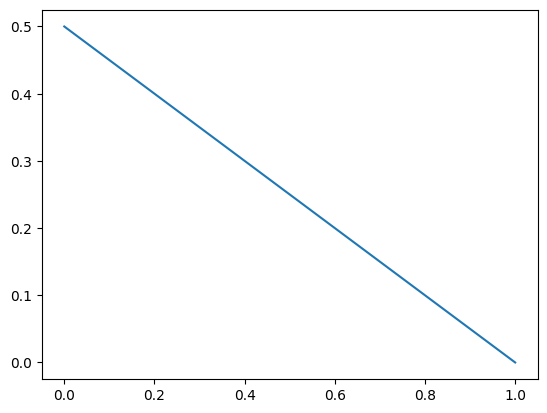

In [ ]:
x = np.linspace(0, 1, 100)
plt.plot(x, a_stat_point_b(x, 1, 1, 1)) # a_stat_point in function of b_stat_point

## Numerical integration

In [ ]:
# function that returns dz/dt
def integrator(lambd, mu, sigma, K, lambd_p, a0_0, b0_0):

    a_stat = (K - mu/lambd)/(1 + (lambd_p*K/sigma))
    b_stat = mu/lambd

    def model(z,t):
        a = z[0]
        b = z[1]
        dadt = lambd*a*b - mu*a
        dbdt = sigma*b*(1-(a+b)/K) - lambd_p*a*b
        dzdt = [dadt,dbdt]
        return dzdt

    # initial condition
    z0 = [a0_0,b0_0]

    # number of time points
    t_max = 100
    n = 10*t_max + 1

    # time points
    t = np.linspace(0,t_max,n)

    # store solution
    x = np.empty_like(t)
    y = np.empty_like(t)
    # record initial conditions
    x[0] = z0[0]
    y[0] = z0[1]

    # solve ODE
    for i in range(1,n):
        # span for next time step
        tspan = [t[i-1],t[i]]
        # solve for next step
        z = odeint(model,z0,tspan)
        # store solution for plotting
        x[i] = z[1][0]
        y[i] = z[1][1]
        # next initial condition
        z0 = z[1]

    # plot results
    plt.plot(t,x,'b-',label='a0(t)')
    plt.plot(t,y,'r--',label='b0(t)')
    plt.ylabel('values')
    plt.xlabel('time')
    plt.legend(loc='best')
    plt.show()

    print(a_stat)
    print(b_stat)

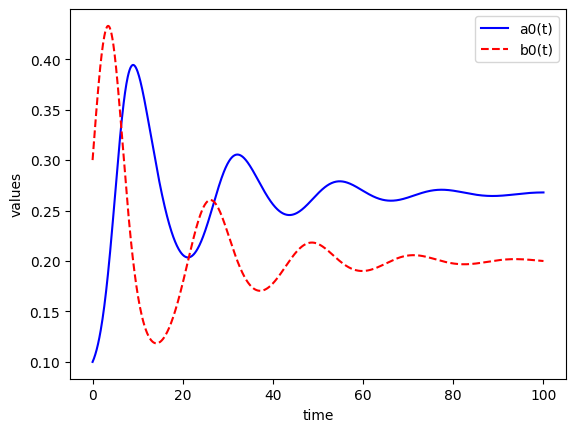

0.26666666666666666
0.2


In [ ]:
integrator(lambd = 1, mu = 0.2, sigma = 0.5, K = 1, lambd_p = 1, a0_0 = 0.1, b0_0 = 0.3)

In [ ]:
def NoMove_stationary(lambd, mu, sigma, K, lambd_p):
  b_stat = mu/lambd
  if b_stat<K:
    a_stat = (K - b_stat)/(1 + (lambd_p*K/sigma))
    return [a_stat, b_stat]
  elif b_stat>K:
    return [0, K]



def NoMove_dynamics(z0, t, lambd, mu, sigma, K, lambd_p):
    a, b = z0
    dadt = lambd*a*b - mu*a
    dbdt = sigma*b*(1-(a+b)/K) - lambd_p*a*b

    return np.array([dadt, dbdt])

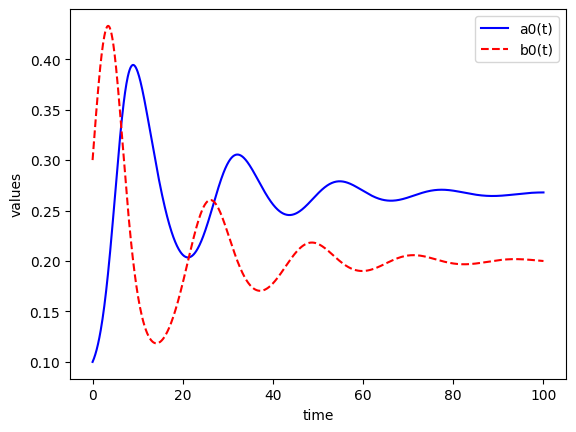

In [ ]:
z0 = [0.1, 0.3]
lambd, mu, sigma, K, lambd_p = 1, 0.2, 0.5, 1, 1

tmax, Nt = 100., 1000
t = np.linspace(0., tmax, Nt)
a, b = odeint(NoMove_dynamics, z0, t, args = (lambd, mu, sigma, K, lambd_p)).T

plt.plot(t,a,'b-',label='a0(t)')
plt.plot(t,b,'r--',label='b0(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

In [ ]:
z_stat = NoMove_stationary(lambd, mu, sigma, K, lambd_p)
z_stat

[0.26666666666666666, 0.2]

In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ('Trajectories', 'Phase Diagram'))


trace = go.Scatter(x = t,
                   y = a,
                   name = '$a$',
                   mode = 'lines',
                   hovertemplate = '%{y}<extra></extra>')
fig.add_trace(trace, row = 1, col = 1)
trace = go.Scatter(x = t,
                   y = b,
                   name = '$b$',
                   mode = 'lines',
                   hovertemplate = '%{y}<extra></extra>')
fig.add_trace(trace, row = 1, col = 1)
trace = go.Scatter(x = t, y = [z_stat[0]]*Nt, name = '$a^*$', marker = dict(color = 'blue'), mode = 'lines', line_dash = 'dash', hovertemplate = '%{y}<extra></extra>')
fig.add_trace(trace, row = 1, col = 1)
trace = go.Scatter(x = t, y = [z_stat[1]]*Nt, name = '$b^*$', marker = dict(color = 'red'), mode = 'lines', line_dash = 'dash', hovertemplate = '%{y}<extra></extra>')
fig.add_trace(trace, row = 1, col = 1)


trace = go.Scatter(x = a,
                   y = b,
                   marker = dict(color = 'darkorchid'),
                   mode = 'lines',
                   hovertemplate = '(%{x},%{y})<extra></extra>',
                   showlegend = False)
fig.add_trace(trace, row = 1, col = 2)
trace = go.Scatter(x = [z0[0]], y = [z0[1]], name = '$(a_0,\,b_0)$', marker = dict(color = 'red', size = 10, symbol = 'x'), hovertemplate = '%{y}<extra></extra>')
fig.add_trace(trace, row = 1, col = 2)
trace = go.Scatter(x = [z_stat[0]], y = [z_stat[1]], name = '$(a^*,\,b^*)$', marker = dict(color = '#2ca02c', size = 10, symbol = 'x'), hovertemplate = '%{y}<extra></extra>')
fig.add_trace(trace, row = 1, col = 2)


fig.update_layout(title_text = 'Analytical population model - No Movement', legend = dict(x=0.98, y=0))
fig.update_xaxes(title_text = '$Timestep$', row = 1, col = 1)
fig.update_yaxes(title_text = '$Population\,\,densities$', row = 1, col = 1)
fig.update_xaxes(title_text = '$a$', row = 1, col = 2)
fig.update_yaxes(title_text = '$b$', row = 1, col = 2)
fig.show()

In [ ]:
z0 = [0.1, 0.3]
lambd, mu, sigma, lambd_p = 1, 0.2, 0.5, 1

tmax, Nt = 250., 1000
t = np.linspace(0., tmax, Nt)
a, b = odeint(NoMove_dynamics, z0, t, args = (lambd, mu, sigma, K, lambd_p)).T

In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles = ('Trajectories', 'Phase Diagram'))

Ks = np.linspace(10e-3, 1., 50)
for K in Ks:
    a, b = odeint(NoMove_dynamics, z0, t, args = (lambd, mu, sigma, K, lambd_p)).T
    z_stat = NoMove_stationary(lambd, mu, sigma, K, lambd_p)

    trace = go.Scatter(x = t,
                       y = a,
                       name = '$a$',
                       mode = 'lines',
                       hovertemplate = '%{y}<extra></extra>',
                       visible = False)
    fig.add_trace(trace, row = 1, col = 1)
    trace = go.Scatter(x = t,
                       y = b,
                       name = '$b$',
                       mode = 'lines',
                       hovertemplate = '%{y}<extra></extra>',
                       visible = False)
    fig.add_trace(trace, row = 1, col = 1)
    trace = go.Scatter(x = t, y = [z_stat[0]]*Nt, name = '$a^*$', marker = dict(color = 'blue'), mode = 'lines', line_dash = 'dash', hovertemplate = '%{y}<extra></extra>', visible = False)
    fig.add_trace(trace, row = 1, col = 1)
    trace = go.Scatter(x = t, y = [z_stat[1]]*Nt, name = '$b^*$', marker = dict(color = 'red'), mode = 'lines', line_dash = 'dash', hovertemplate = '%{y}<extra></extra>', visible = False)
    fig.add_trace(trace, row = 1, col = 1)


    trace = go.Scatter(x = a,
                       y = b,
                       marker = dict(color = 'darkorchid'),
                       mode = 'lines',
                       hovertemplate = '(%{x},%{y})<extra></extra>',
                       showlegend = False,
                       visible = False)
    fig.add_trace(trace, row = 1, col = 2)
    trace = go.Scatter(x = [z0[0]], y = [z0[1]], name = '$(a_0,\,b_0)$', marker = dict(color = 'red', size = 10, symbol = 'x'), hovertemplate = '%{y}<extra></extra>', visible = False)
    fig.add_trace(trace, row = 1, col = 2)
    trace = go.Scatter(x = [z_stat[0]], y = [z_stat[1]], name = '$(a^*,\,b^*)$', marker = dict(color = '#2ca02c', size = 10, symbol = 'x'), hovertemplate = '%{y}<extra></extra>', visible = False)
    fig.add_trace(trace, row = 1, col = 2)


fig.data[0].visible, fig.data[1].visible, fig.data[2].visible, fig.data[3].visible, fig.data[4].visible, fig.data[5].visible, fig.data[6].visible = True, True, True, True, True, True, True

steps = []
for i in range(0, len(fig.data), 7):
    step = dict(method = 'update',
                args = [{'visible': [False]*len(fig.data)}],
                label = str(round(Ks[int(i/7)], 2)))
    step['args'][0]['visible'][i], step['args'][0]['visible'][i+1], step['args'][0]['visible'][i+2], step['args'][0]['visible'][i+3], step['args'][0]['visible'][i+4], step['args'][0]['visible'][i+5], step['args'][0]['visible'][i+6] = True, True, True, True, True, True, True
    steps.append(step)


fig.update_layout(title_text = 'Analytical population model - No Movement', legend = dict(y = 1.2),
                  sliders = [dict(steps = steps, currentvalue={"prefix": "K="}, pad = dict(t = 75, b = 4, l = 40))])
fig.update_xaxes(title_text = '$Timestep$', row = 1, col = 1)
fig.update_yaxes(title_text = '$Population\,\,densities$', row = 1, col = 1)
fig.update_xaxes(title_text = '$a$', row = 1, col = 2)
fig.update_yaxes(title_text = '$b$', row = 1, col = 2)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Stochastic simulation - Gillespie

In [ ]:
mu = 0.2 # predator mortality
lambd = 1 # rate of eating
sigma = 1 # reproduction rate of preys
N = 1000 # number of available "sites", even though we don't have space here

In [ ]:
### using lists since we don't know the size of the final arrays

t = [0] # time array
a = [0.56*N] # predators
b = [0.32*N] # preys
c = [0.12*N] # empty space

t_end = 1000
while(t[-1] < t_end):

    a_t = a[-1]
    b_t = b[-1]
    c_t = c[-1]

    # reaction 1: a -> c
    # reaction 2: a+b -> a+a
    # reaction 3: b+c -> b+b

    rates = np.array([mu*a_t, lambd*a_t*b_t/N, sigma*b_t*c_t/N]) # rates of the reactions
    norm_rates = rates/np.sum(rates)

    tau = np.random.exponential(scale = 1/np.sum(rates)) # exponentially distributed, with mean value 1/sum(rates)
    t.append(t[-1] + tau)

    index = np.random.choice(np.arange(3), p = norm_rates) # choice of the type of reaction
    if index == 0: # reaction 1
        a.append(a_t-1)
        b.append(b_t)
        c.append(c_t+1)
    elif index == 1: # reaction 2
        a.append(a_t+1)
        b.append(b_t-1)
        c.append(c_t)
    elif index == 2: # reaction 3
        a.append(a_t)
        b.append(b_t+1)
        c.append(c_t-1)
    else:
        print("Error")
        break

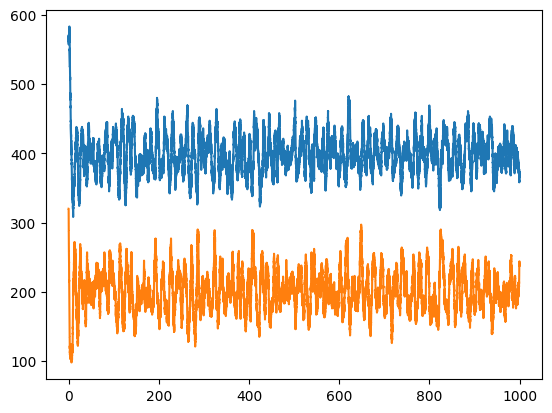

In [ ]:
plt.plot(t, a)
plt.plot(t, b)
#plt.plot(t, c)

In [ ]:
print(len(t))

239060


In [ ]:
print(a_stat_point(lambd, mu, sigma, K=1, lambd_p=1))
print(b_stat_point(lambd, mu, sigma, K=1, lambd_p=1))

0.4
0.2


In [30]:
z_stat = NoMove_stationary(lambd, mu, sigma, K, lambd_p)
z_stat

[0.4, 0.2]

In [31]:
z_stat = N*np.array(z_stat)
z_stat

array([400., 200.])

In [33]:
fig = make_subplots(rows=2, cols=2,  specs=[[{}, {}], [{"colspan":2}, None]], subplot_titles=('Predators Dynamics', 'Preys Dynamics', 'Predators+Preys Dynamics'))

fig.add_trace(go.Scatter(x=t, y=a, name='predators', mode='lines', marker=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=[0,t_end], y=2*[z_stat[0]], mode='lines', line_dash='dash', name='Predators steady state', marker=dict(color='red')), row=1, col=1)
fig.add_trace(go.Scatter(x=t, y=b, name='preys', mode='lines', marker=dict(color='dodgerblue')), row=1, col=2)
fig.add_trace(go.Scatter(x=[0,t_end], y=2*[z_stat[1]], mode='lines', line_dash='dash', name='Preys steady state', marker=dict(color='orange')), row=1, col=2)

fig.add_trace(go.Scatter(x=t, y=a, name='predators', mode='lines', marker=dict(color='blue'), showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=[0,t_end], y=2*[z_stat[0]], mode='lines', line_dash='dash', name='Predators steady state', marker = dict(color='red'), showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=t, y=b, name='preys', mode='lines', marker=dict(color='dodgerblue'), showlegend=False), row=2, col=1)
fig.add_trace(go.Scatter(x=[0,t_end], y=2*[z_stat[1]], mode='lines', line_dash='dash', name='Preys steady state', marker=dict(color='orange'), showlegend=False), row=2, col=1)

fig.update_layout(title_text='No Movement population model - Gillespie algorithm', hovermode='x unified', height=1000)
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Abundance')
fig.show()

Output hidden; open in https://colab.research.google.com to view.